In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfS = pd.read_csv("sargento-salinidad-201117.csv", header=None, skiprows=3, names=['FECH', 'COND', 'TEMP', 'SPCD', 'SALY'])
dfN = pd.read_csv("sargento_201117.csv", header=None, skiprows=2, names=['FECH', 'PRES', 'TEMP', 'WL'])

In [3]:
dfN=dfN.drop(dfN.index[len(dfN)-1])

In [4]:
dfS=dfS.reset_index()
dfN=dfN.reset_index()

In [5]:
dfS=dfS.drop('index', axis=1)
dfN=dfN.drop('index', axis=1)

In [6]:
dfN.head(3)

,FECH,PRES,TEMP,WL
0,10/26/2017 13:00:00,105.612,24.448,-0.150
1,10/26/2017 13:15:00,105.513,24.351,-0.160
2,10/26/2017 13:30:00,105.433,24.351,-0.168


In [7]:
dfS.head(3)

,FECH,COND,TEMP,SPCD,SALY
0,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588
1,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
2,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794


In [8]:
dfN['Ndate'] = pd.to_datetime(dfN['FECH'], format='%m/%d/%Y %H:%M:%S')
dfN['month'] = dfN['Ndate'].dt.month
dfS['Ndate'] = pd.to_datetime(dfS['FECH'], format='%m/%d/%Y %H:%M:%S')
dfS['month'] = dfS['Ndate'].dt.month

In [9]:
dfN.head(3)

,FECH,PRES,TEMP,WL,Ndate,month
0,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10
1,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
2,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10


In [10]:
dfS.head(3)

,FECH,COND,TEMP,SPCD,SALY,Ndate,month
0,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588,2017-10-26 13:00:00,10
1,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
2,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10


In [11]:
dfN=pd.DataFrame(dfN)
dfS=pd.DataFrame(dfS)

In [12]:
dfS.dtypes
dfN.dtypes

FECH             object
PRES            float64
TEMP            float64
WL              float64
Ndate    datetime64[ns]
month             int64
dtype: object

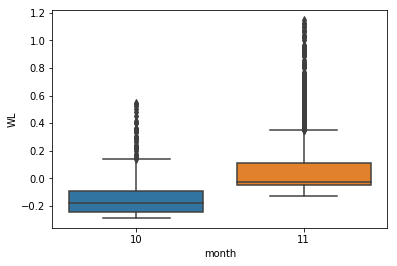

In [13]:
ax = sns.boxplot(x="month", y="WL", data=dfN)
plt.show()

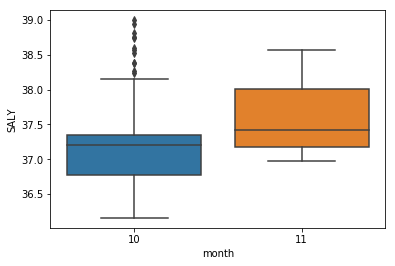

In [14]:
ax = sns.boxplot(x="month", y="SALY", data=dfS)
plt.show()

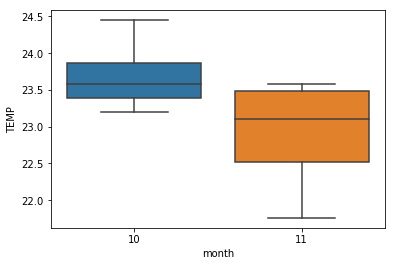

In [15]:
ax = sns.boxplot(x="month", y="TEMP", data=dfN)
plt.show()

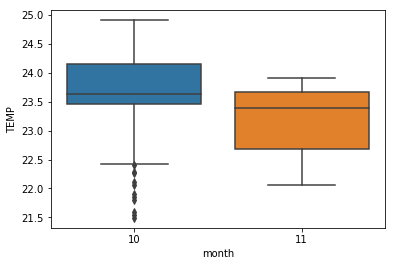

In [16]:
ax = sns.boxplot(x="month", y="TEMP", data=dfS)
plt.show()

In [17]:
dfN.describe()

,PRES,TEMP,WL,month
count,2394.000000,2394.000000,2394.000000,2394.000000
mean,107.430007,23.120883,0.030863,10.781119
std,2.371844,0.563555,0.235974,0.413574
min,104.229000,21.760000,-0.288000,10.000000
25%,106.407000,22.525000,-0.071000,11.000000
50%,106.764000,23.388000,-0.035000,11.000000
75%,107.305000,23.484000,0.018750,11.000000
max,118.641000,24.448000,1.146000,11.000000


In [18]:
dfS.describe()

,COND,TEMP,SPCD,SALY,month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,54524.972807,23.316646,56386.831662,37.479737,10.781119
std,11.876669,0.547033,619.501987,0.464974,0.413574
min,54105.700000,21.490000,54622.100000,36.158800,10.000000
25%,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,54525.500000,24.910000,58398.700000,38.994200,11.000000


In [19]:
dfS1 = dfS[['SALY','TEMP']]
dfN1 = dfN[['WL','TEMP']]

GRAF= pd.concat([dfS1, dfN1], axis=1)

In [20]:
GRAF.head(3)

,SALY,TEMP,WL,TEMP
0,36.1588,24.91,-0.150,24.448
1,36.2311,24.82,-0.160,24.351
2,36.2794,24.76,-0.168,24.351


In [21]:
GRAF.columns = ['SALY', 'TEMP1', 'WL', 'TEMP2']

In [22]:
GRAF.head(3)

,SALY,TEMP1,WL,TEMP2
0,36.1588,24.91,-0.150,24.448
1,36.2311,24.82,-0.160,24.351
2,36.2794,24.76,-0.168,24.351


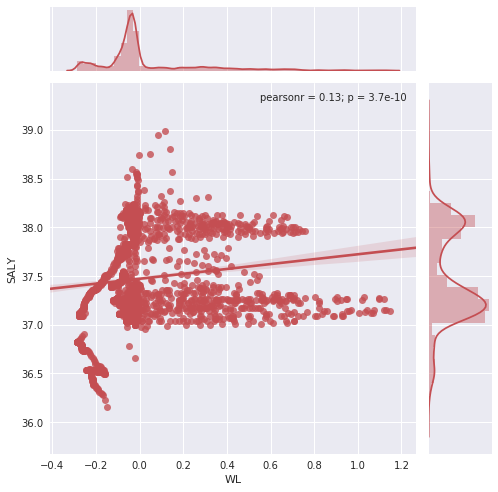

In [23]:
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WL", "SALY", data=GRAF, kind="reg",
                   color="r", size=7)
plt.show(g)

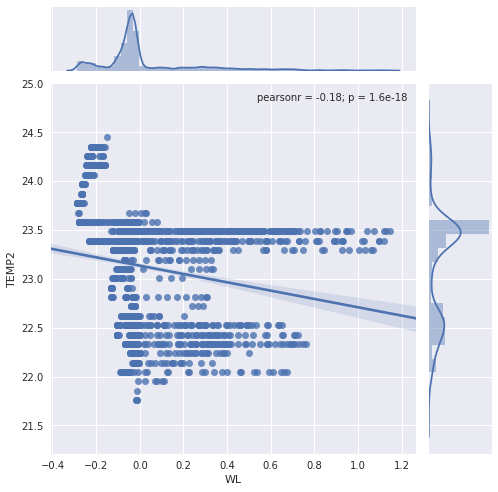

In [24]:
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WL", "TEMP2", data=GRAF, kind="reg",
                   color="b", size=7)
plt.show(g)

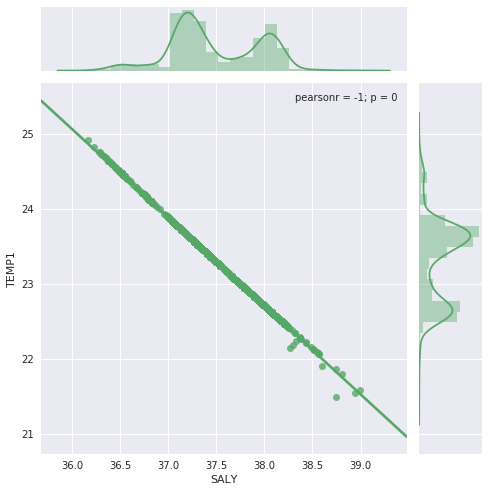

In [25]:
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("SALY", "TEMP1", data=GRAF, kind="reg",
                   color="g", size=7)
plt.show(g)

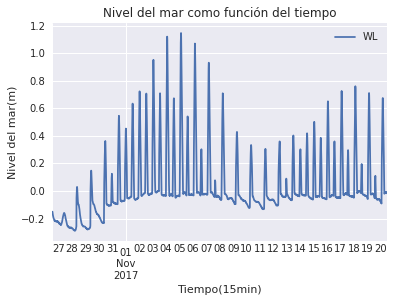

In [26]:
dfN2 = dfN[['WL','Ndate']]
plt.figure(); dfN2.plot(x='Ndate'); plt.legend(loc='best')
plt.title("Nivel del mar como función del tiempo")
plt.ylabel("Nivel del mar(m)")
plt.xlabel("Tiempo(15min)")
plt.grid(True)
plt.show()

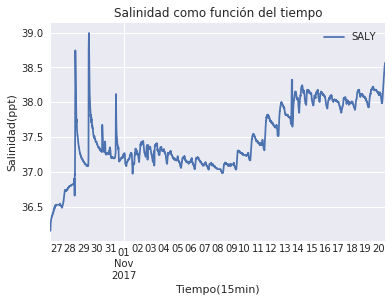

In [27]:
dfS2 = dfS[['SALY','Ndate']]
plt.figure(); dfS2.plot(x='Ndate'); plt.legend(loc='best')
plt.title("Salinidad como función del tiempo")
plt.ylabel("Salinidad(ppt)")
plt.xlabel("Tiempo(15min)")
plt.grid(True)
plt.show()

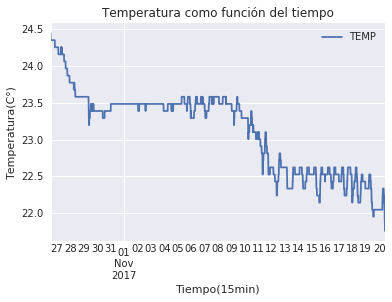

In [28]:
dfN2 = dfN[['TEMP','Ndate']]
plt.figure(); dfN2.plot(x='Ndate'); plt.legend(loc='best')
plt.title("Temperatura como función del tiempo")
plt.ylabel("Temperatura(C°)")
plt.xlabel("Tiempo(15min)")
plt.grid(True)
plt.show()

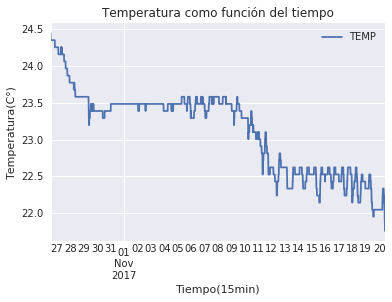

In [29]:
dfS2 = dfS[['TEMP','Ndate']]
plt.figure(); dfN2.plot(x='Ndate'); plt.legend(loc='best')
plt.title("Temperatura como función del tiempo")
plt.ylabel("Temperatura(C°)")
plt.xlabel("Tiempo(15min)")
plt.grid(True)
plt.show()

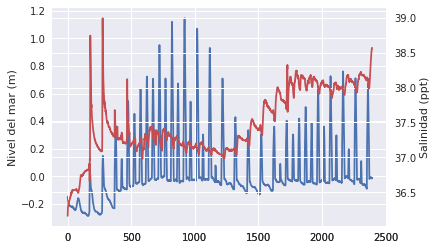

In [30]:
from pylab import figure, show, legend, ylabel
 
# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(GRAF['WL'], 'b-')
ylabel("Nivel del mar (m)")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(GRAF['SALY'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Salinidad (ppt)")

show()

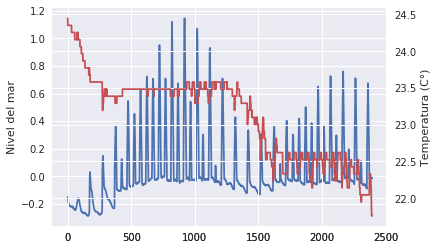

In [31]:
from pylab import figure, show, legend, ylabel
 
# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(GRAF['WL'], 'b-')
ylabel("Nivel del mar")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(GRAF['TEMP2'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Temperatura (C°)")

show()

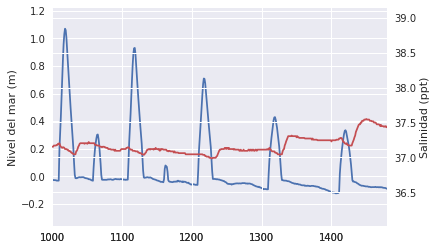

In [32]:
from pylab import figure, show, legend, ylabel
 
# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(GRAF['WL'], 'b-')
ylabel("Nivel del mar (m)")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(GRAF['SALY'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Salinidad (ppt)")

plt.xlim([1000,1480])
show()

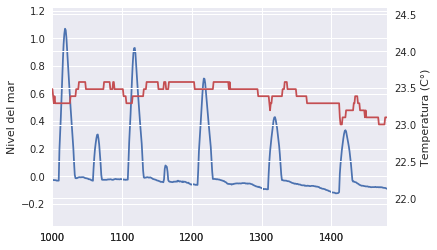

In [33]:
from pylab import figure, show, legend, ylabel
 
# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(GRAF['WL'], 'b-')
ylabel("Nivel del mar")
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(GRAF['TEMP2'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Temperatura (C°)")

plt.xlim([1000,1480])
show()